In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

In [1]:
# get the dataset
data = pd.read_csv('Student_performance_data _.csv')

In [2]:
# check for the first 5 rows
data.sample(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
585,1586,17,0,0,1,1.754353,24,0,2,0,0,0,0,0.184251,4.0
1197,2198,17,1,0,0,14.870885,19,0,3,0,0,0,1,1.812887,4.0
1354,2355,16,1,1,2,18.191109,25,0,1,0,0,1,0,0.690348,4.0
1893,2894,17,1,1,1,2.636207,21,0,1,1,1,0,0,1.069524,4.0
942,1943,18,0,2,1,3.434200,19,0,1,1,0,1,0,1.141639,4.0
700,1701,16,0,0,2,13.075558,6,0,3,0,0,0,0,2.690150,2.0
396,1397,18,1,3,1,2.962016,18,0,2,0,0,0,0,1.089441,4.0
1215,2216,15,1,0,1,1.792635,5,0,1,1,0,1,0,2.434532,3.0
1100,2101,17,1,2,2,10.194710,14,0,3,1,1,0,1,2.005145,3.0
1664,2665,17,1,2,0,11.469992,26,0,2,0,0,0,1,0.200146,4.0


In [3]:
# shape of the data
data.shape

(2392, 15)

In [4]:
# the full infoof the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# check for missing values
data.isnull().sum().sum()

0

In [6]:
# check for the descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [3]:
# check for duplicates
sum(data.duplicated())

0

In [4]:
data.drop(columns=['GPA',"StudentID"],inplace=True)

In [5]:
data.shape

(2392, 13)

In [6]:
# Identify numerical columns: columns with more than 5 unique values are considered numerical
numerical_columns = [col for col in data.columns if data[col].nunique() >5]
# Identify categorical columns: columns that are not numerical and not 'GradeClass'
categorical_column = data.columns.difference(numerical_columns).difference(['GradeClass']).to_list()
print(numerical_columns)
print(categorical_column)

['StudyTimeWeekly', 'Absences']
['Age', 'Ethnicity', 'Extracurricular', 'Gender', 'Music', 'ParentalEducation', 'ParentalSupport', 'Sports', 'Tutoring', 'Volunteering']


**Distribution of Categorical Features**

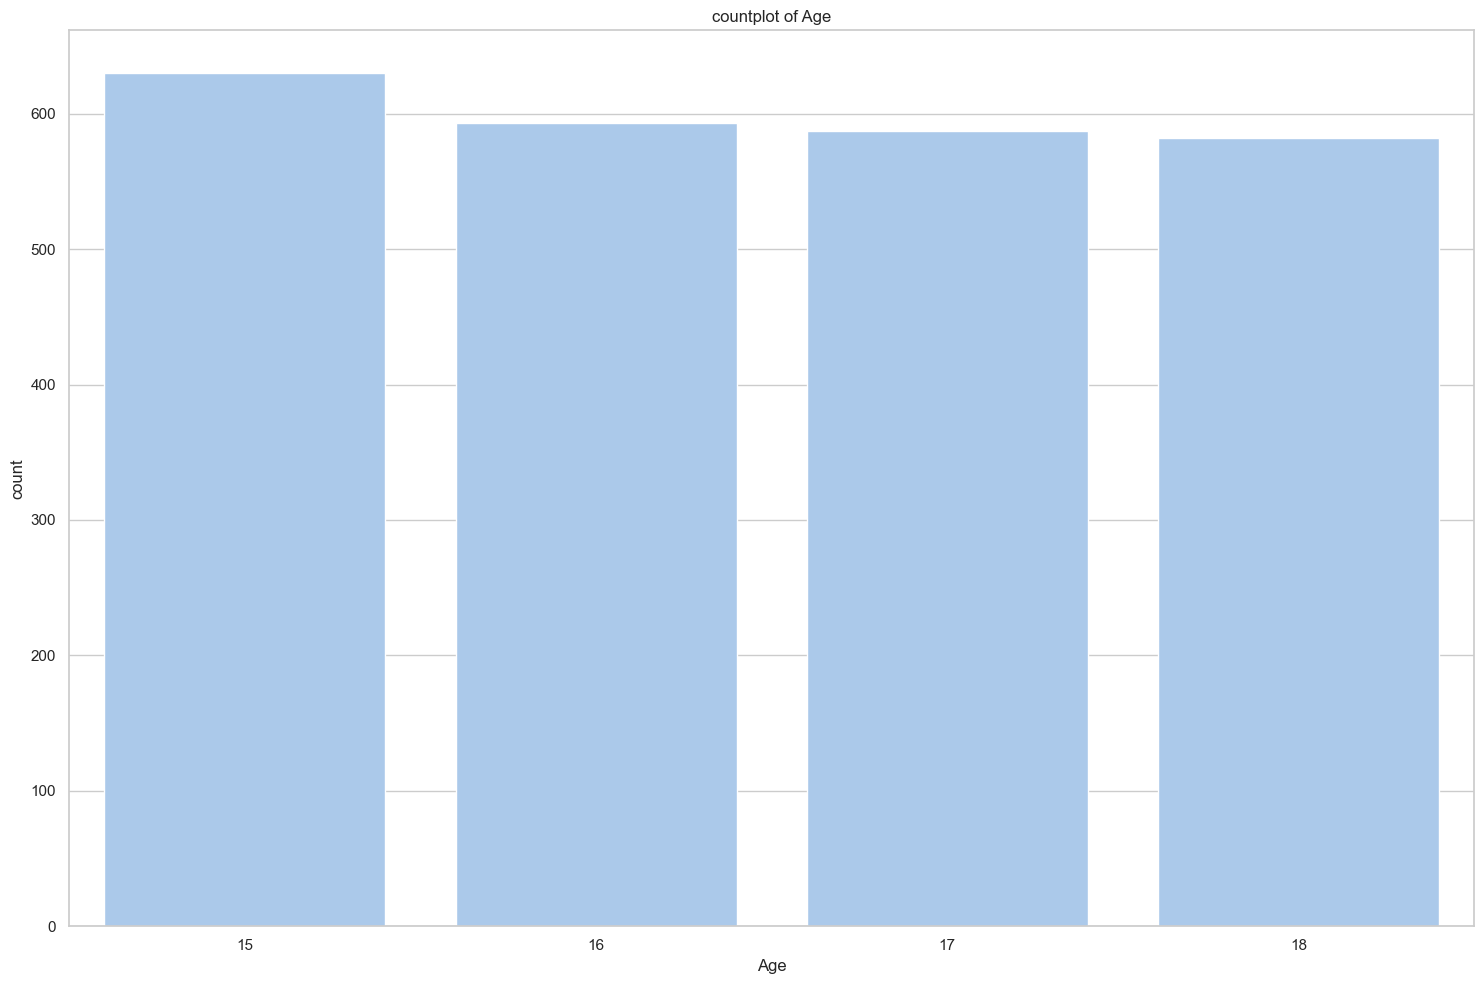

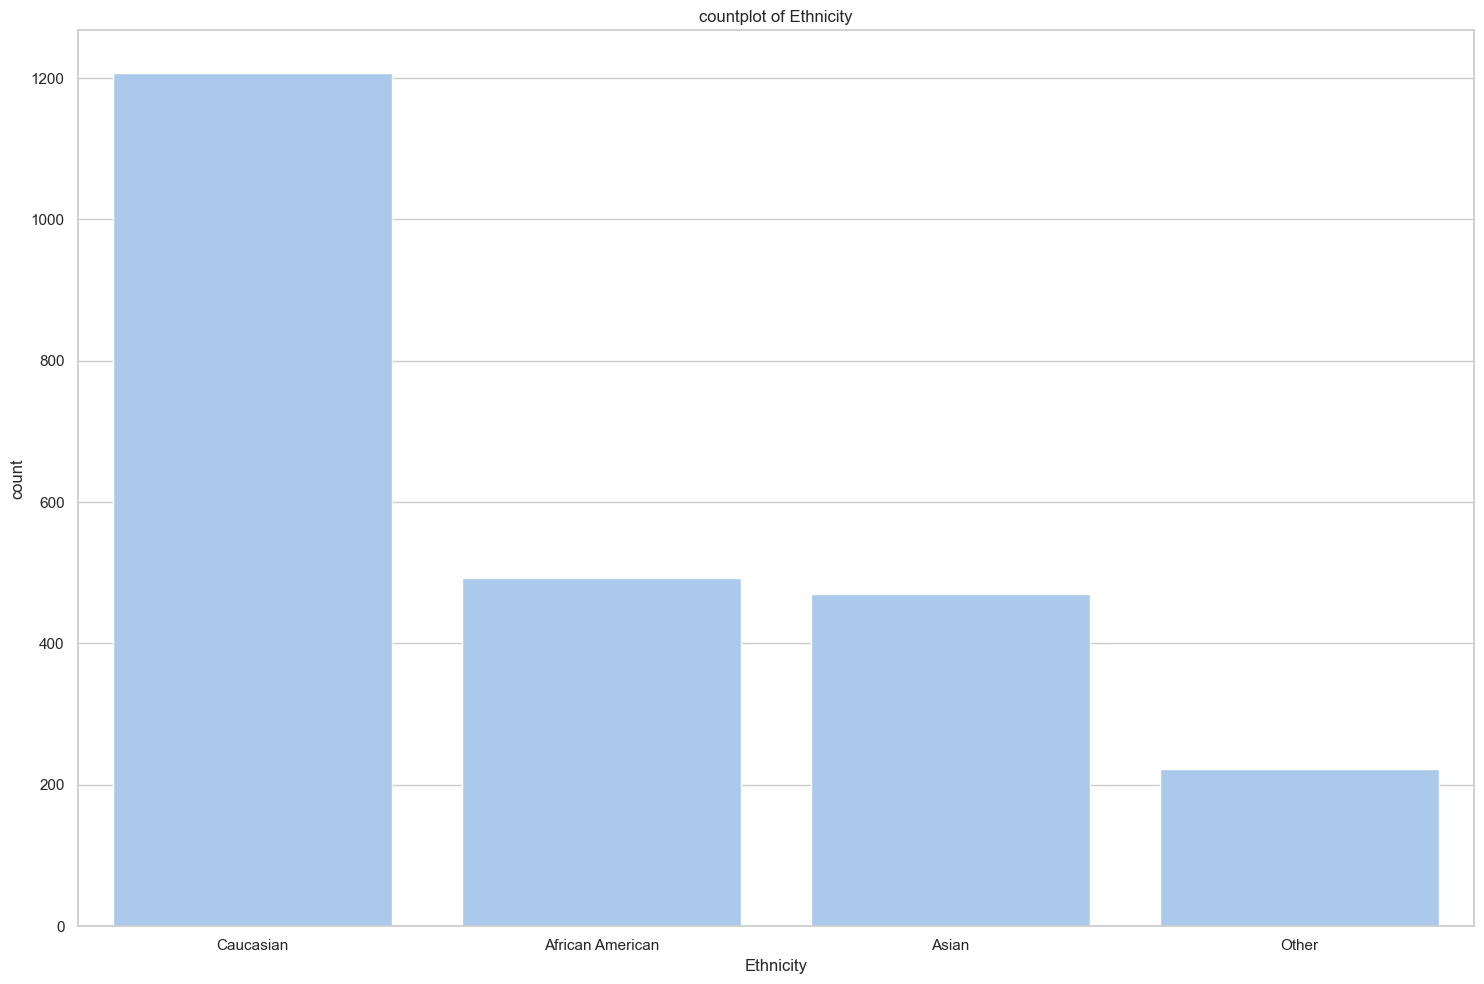

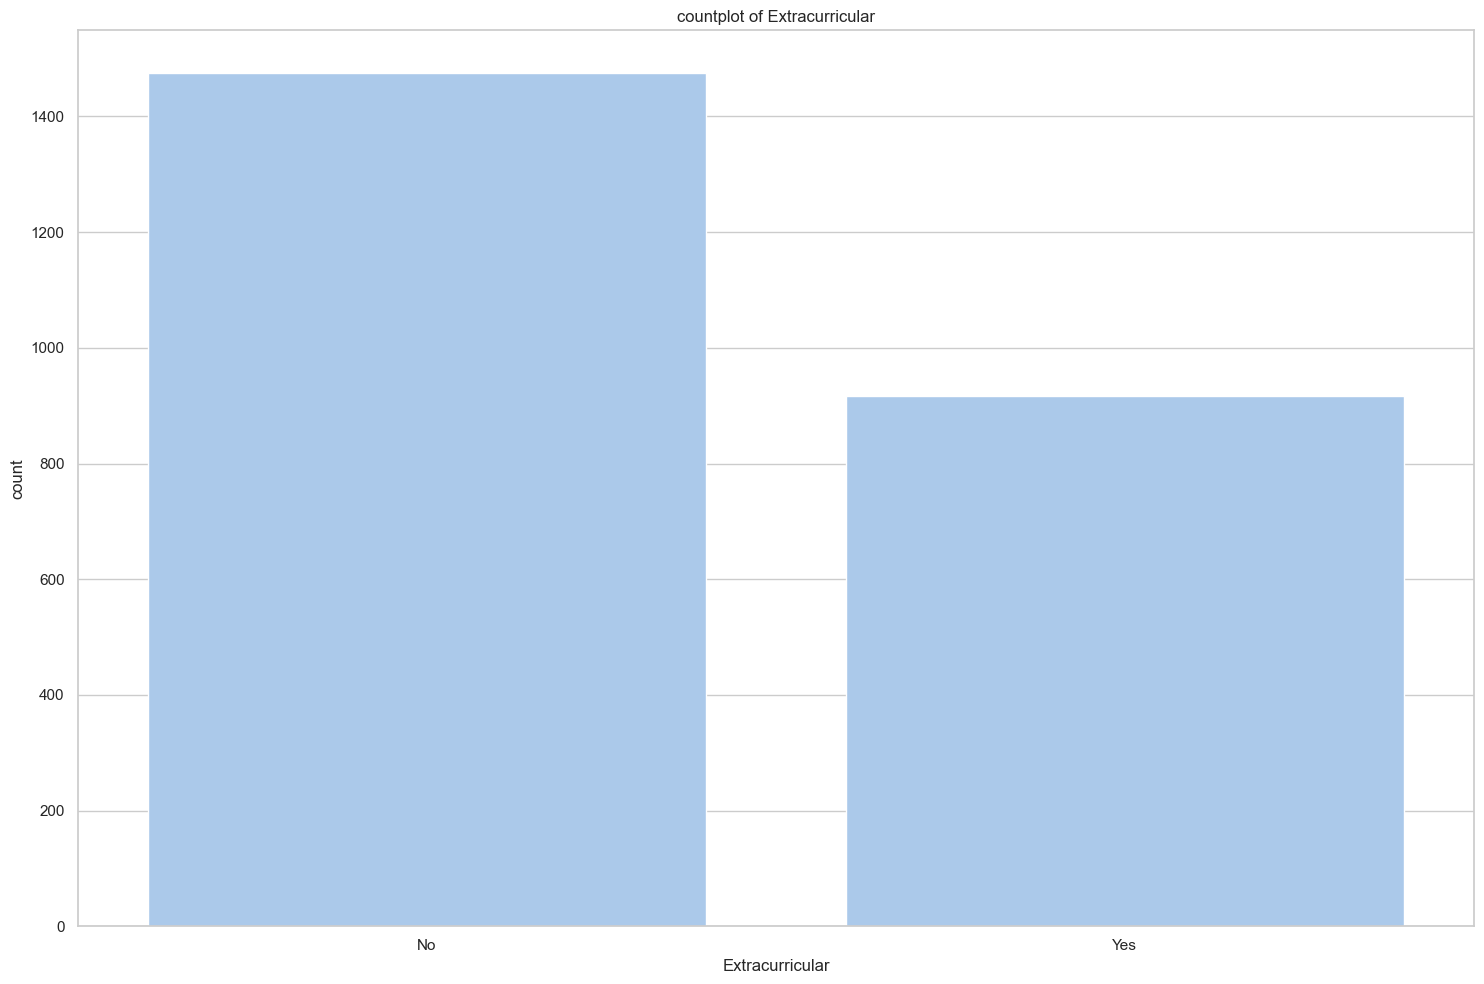

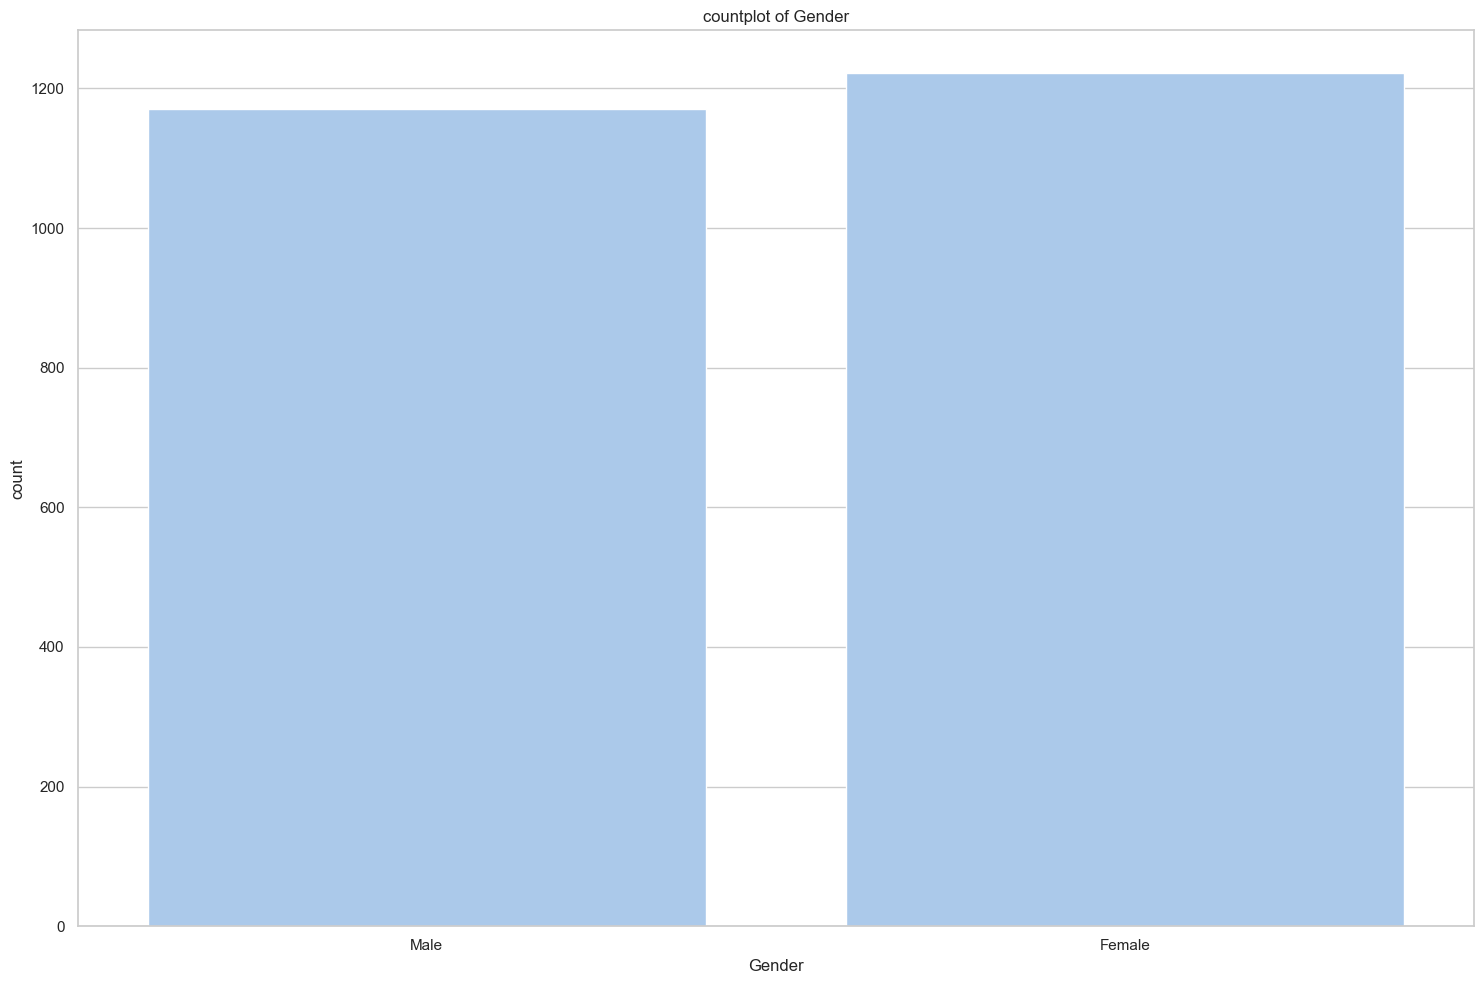

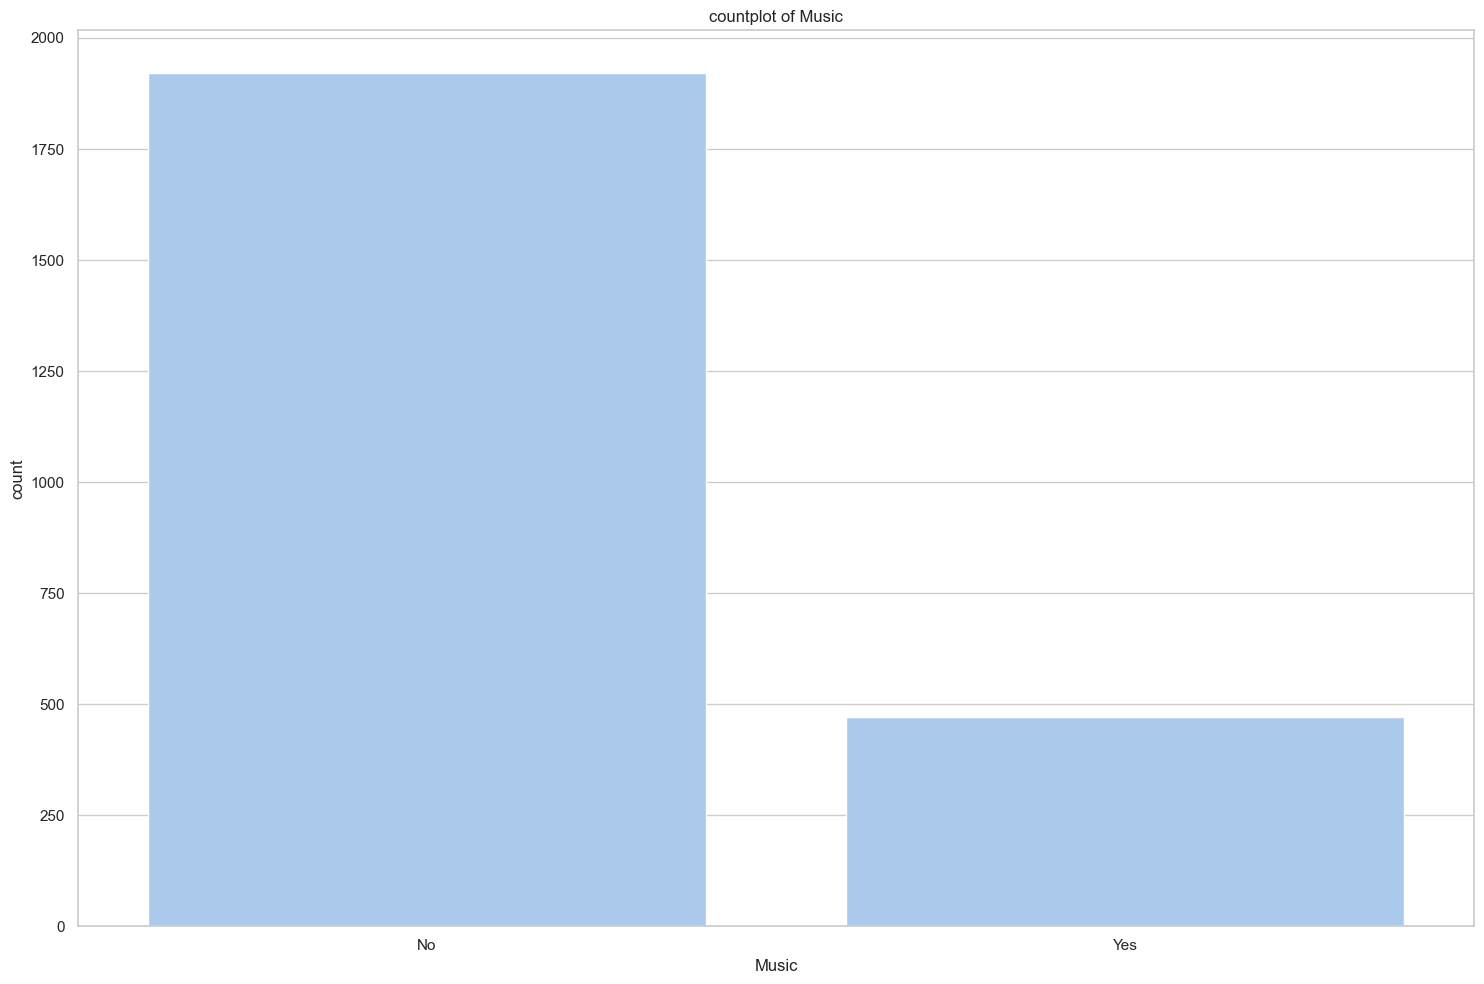

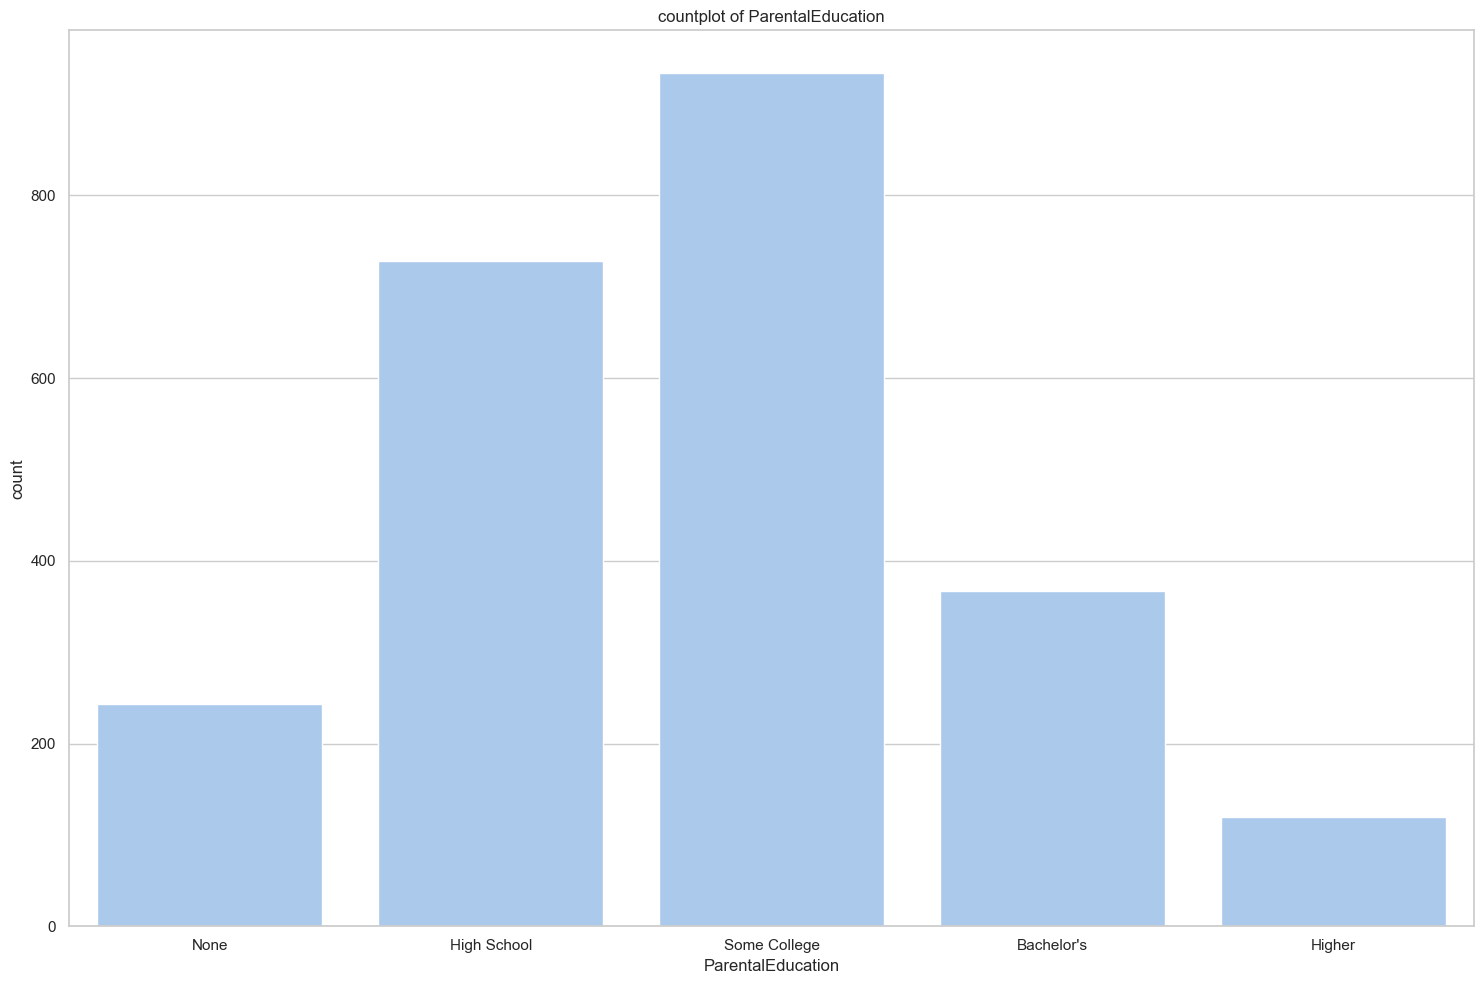

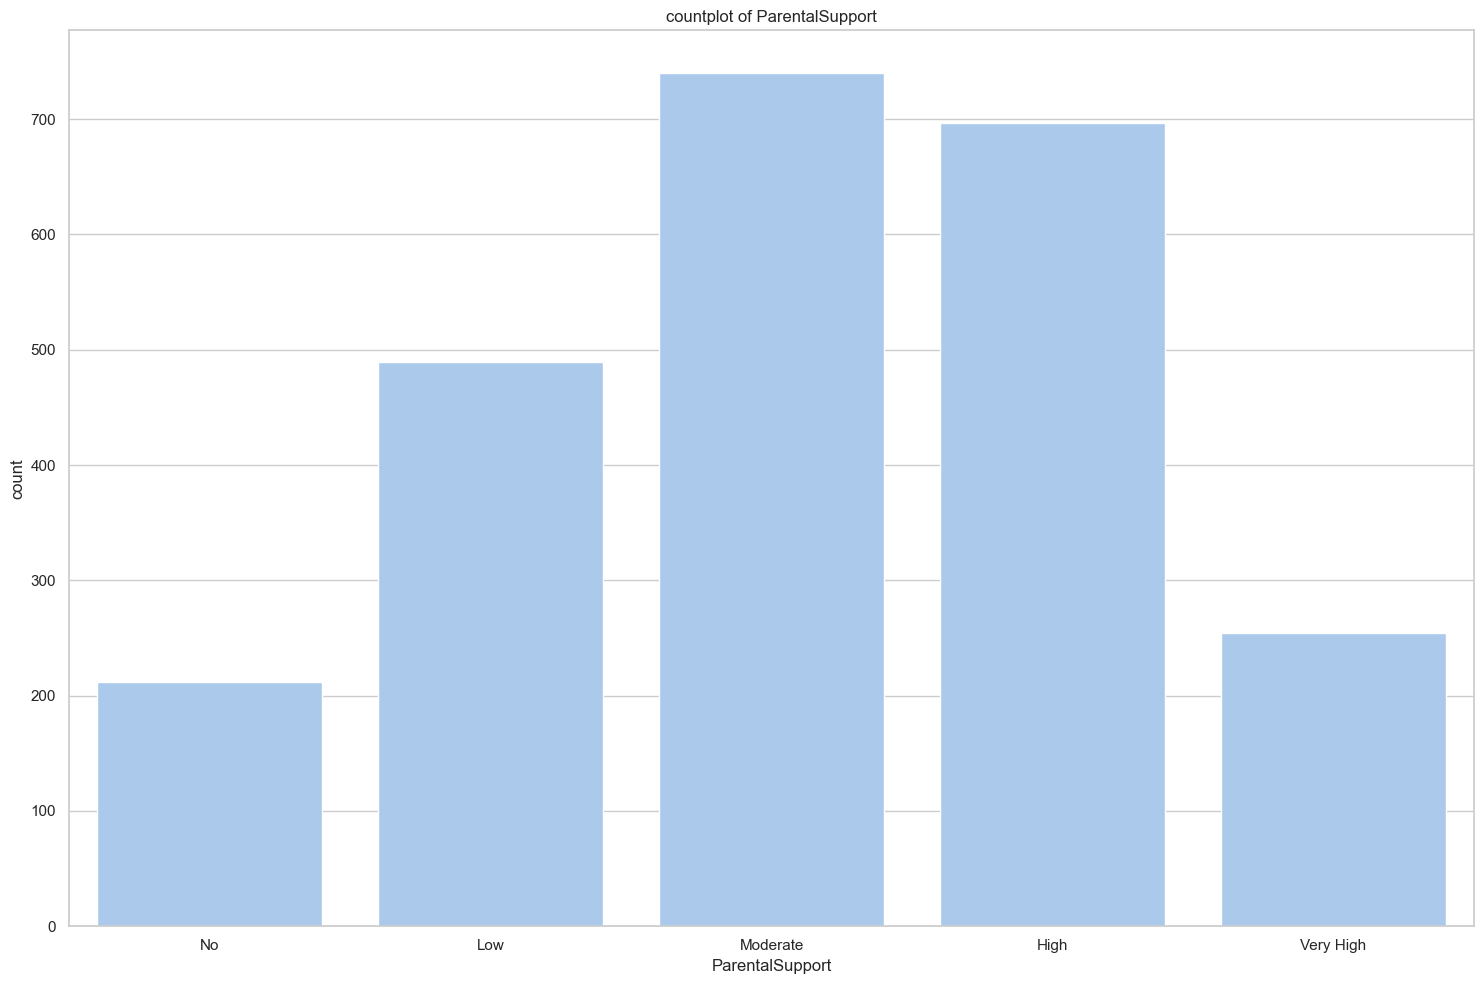

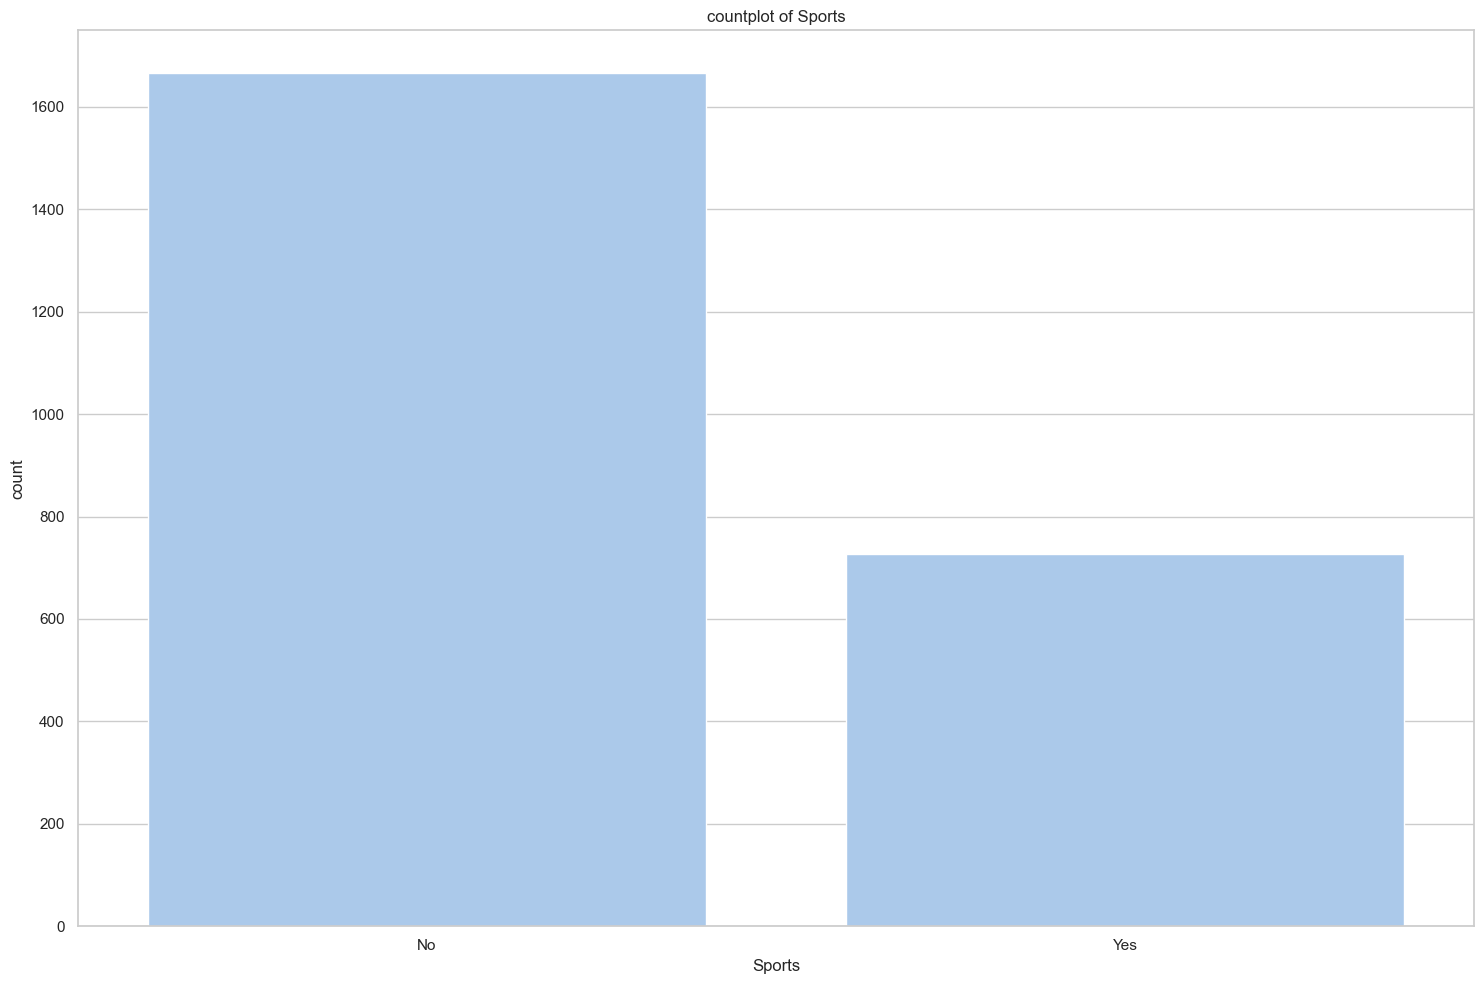

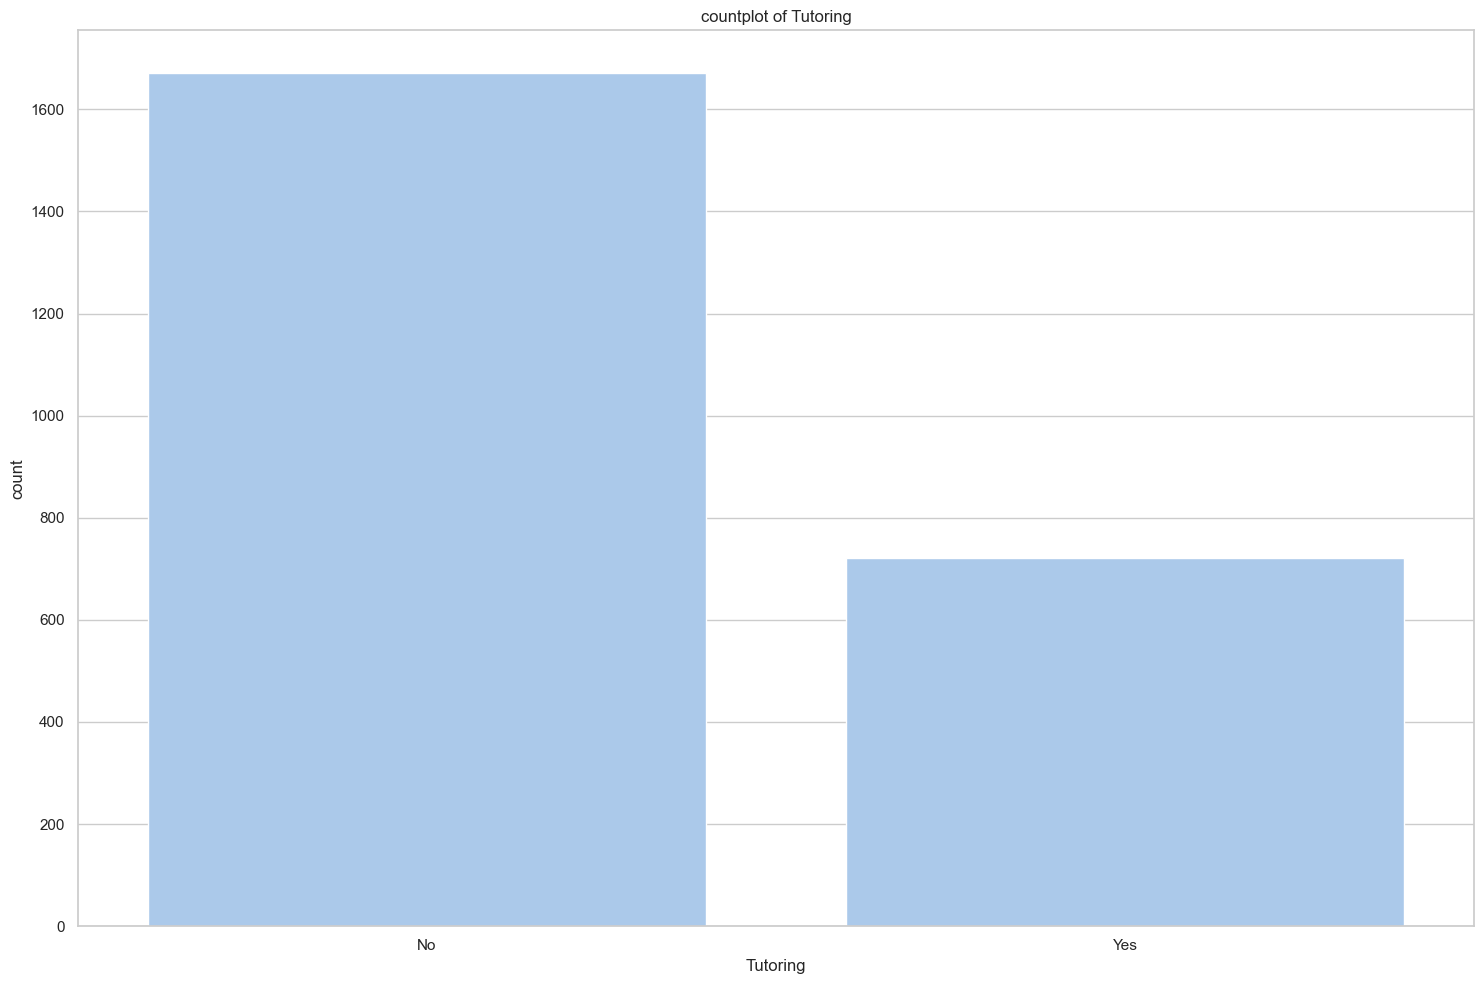

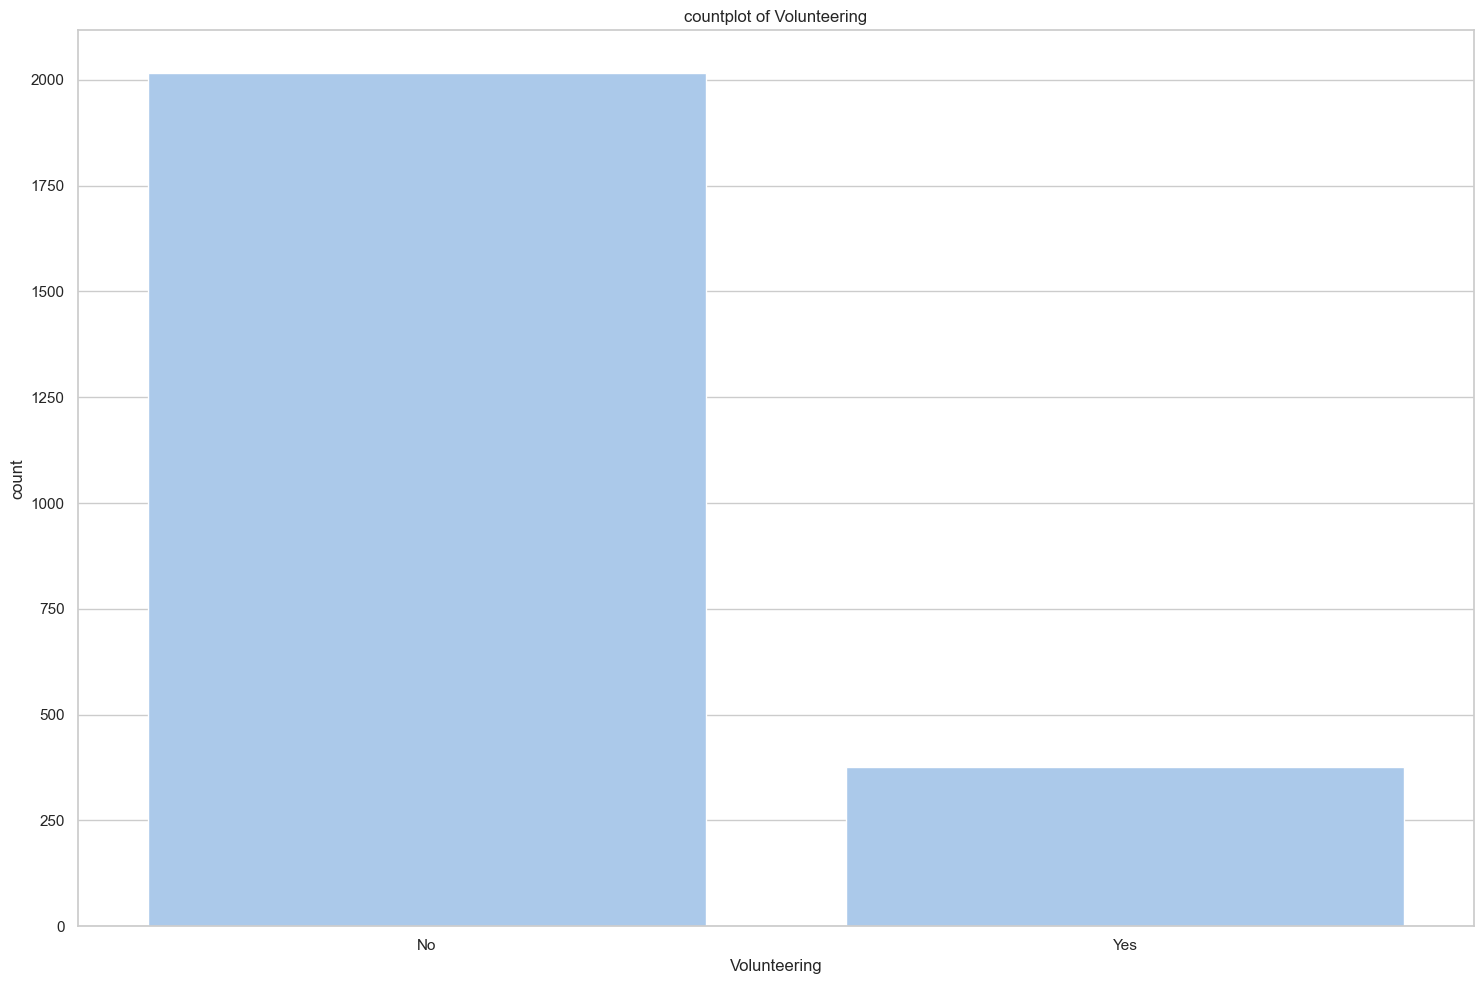

In [7]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}
# plot the categorical column
for col in categorical_column:
    plt.figure(figsize=(15,10))
    sns.countplot(data=data,x=col)
    plt.title(f"countplot of {col}")
    
    # Directly set custom labels
    labels = custom_labels[col]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

**Distribution for Numerical columns**

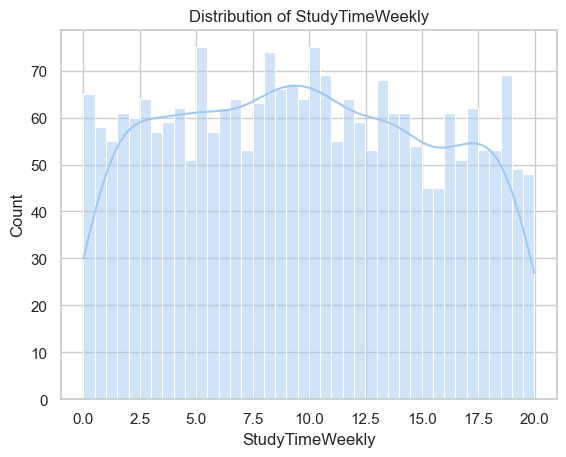

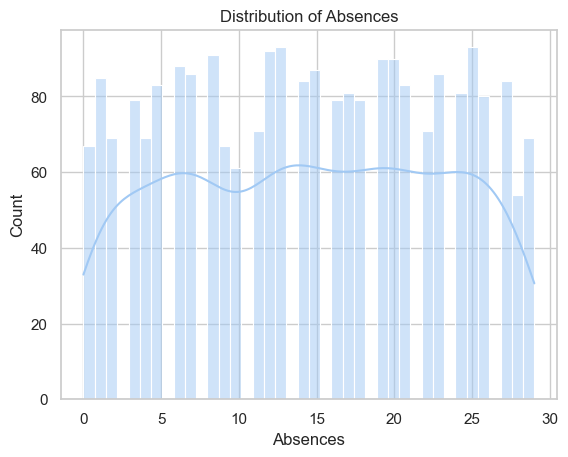

In [9]:
for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True,bins=40)
    plt.title(f"Distribution of {col}")
    plt.show()

**Exploring Correlation**

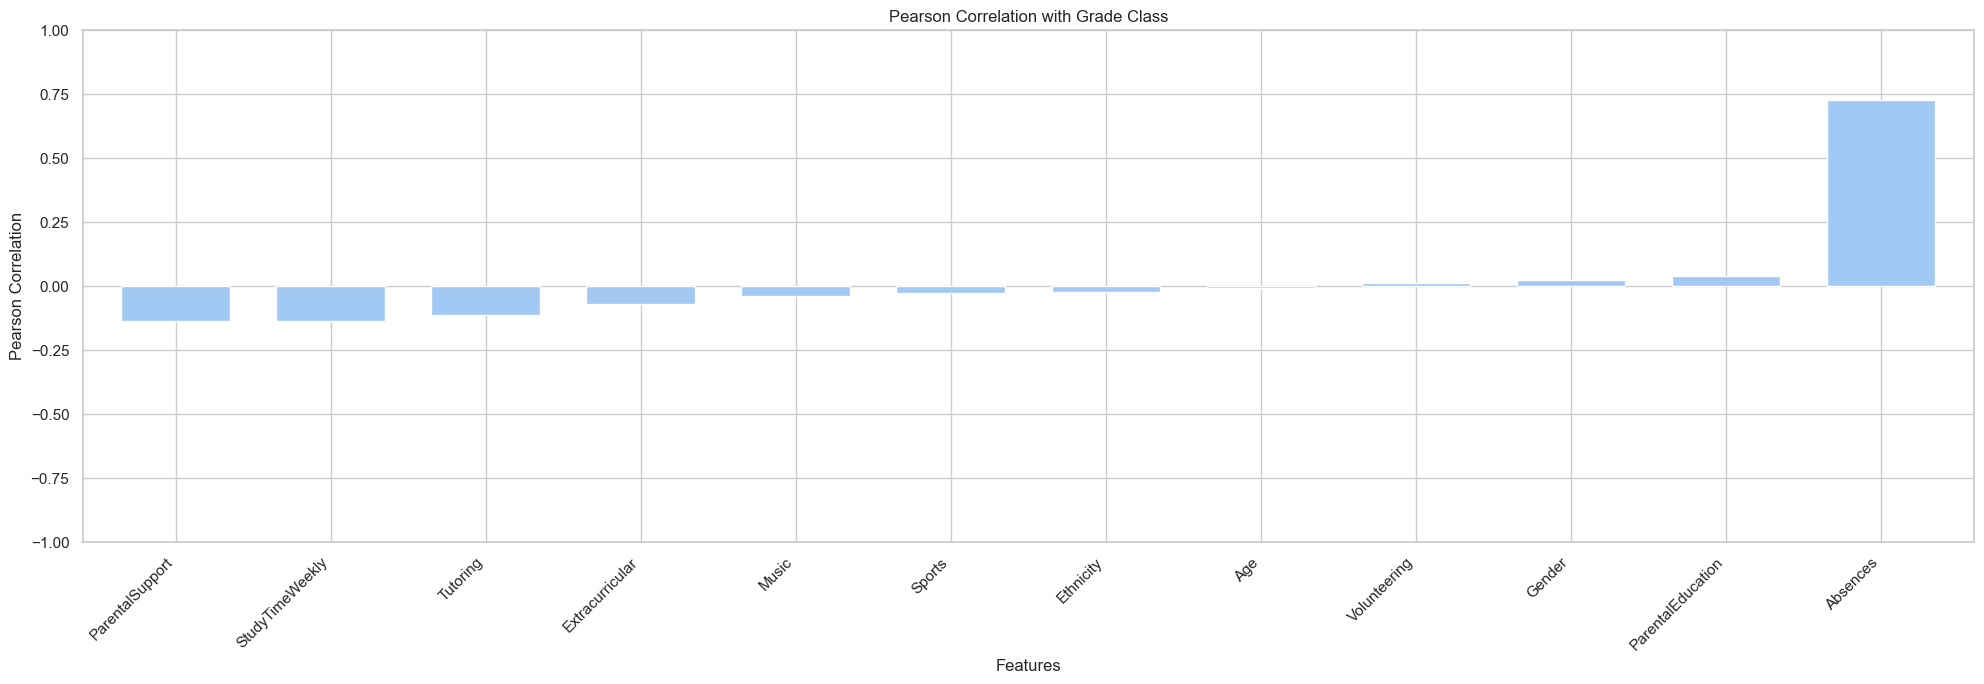

In [10]:
correlation = data.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# plot the heatmap
plt.figure(figsize=(20,7))
#create a bar plot for the pearson correlation coefficients
ax = correlation.plot(kind='bar',width=0.7)

# set the y-axis limit and labels
ax.set(ylim=[-1,1],ylabel='Pearson Correlation',xlabel='Features',title='Pearson Correlation with Grade Class')

# Rotate the x-axis labels for better readability
ax.set_xticklabels(correlation.index,rotation=45,ha='right')
plt.tight_layout()
plt.show()


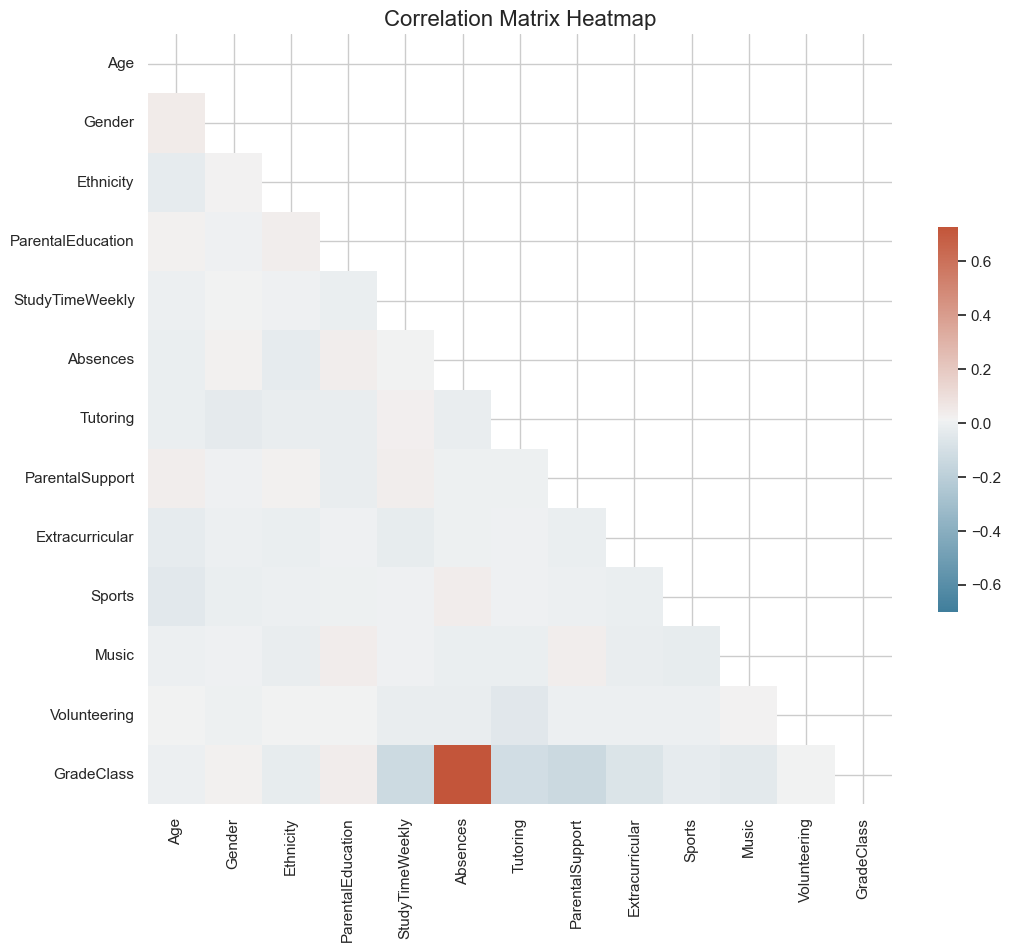

In [11]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap=cmap, cbar_kws={"shrink": .5}, vmin=-0.7, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [12]:

# Calculate the correlation with the Grade Class and find the strongest correlation
grade_class_corr = data.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f"The strongest correlation with the Grade Class is {strongest_correlation} with a value of {strongest_correlation_value:.2f}")

The strongest correlation with the Grade Class is Absences with a value of 0.73


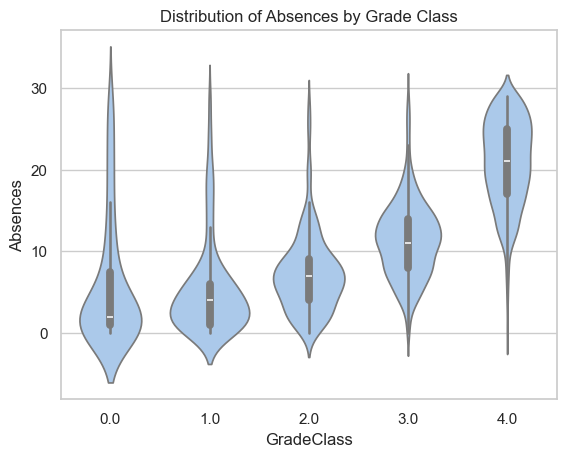

In [13]:
sns.violinplot(data=data, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

**Exploring Outliers**

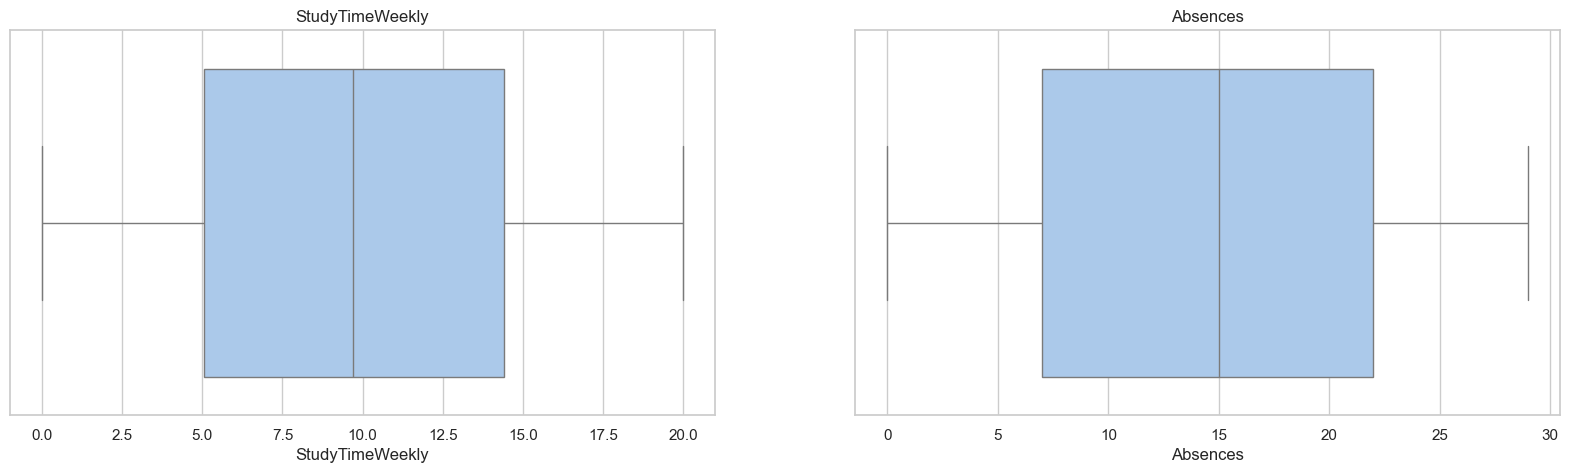

In [17]:
#create a 1X2 subplot with a figure size of 20X5 inches
fig,ax = plt.subplots(1,2,figsize=(20,5))

# loop througth the first 2 numerical columns in the DataFrame
for idx in range(2):
    # create a boxplot for each column
    sns.boxplot(ax=ax[idx],x=data[numerical_columns[idx]])
    ax[idx].set_title(numerical_columns[idx])

In [18]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(data[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,StudyTimeWeekly,Absences
count,2392.000,2392.000
mean,0.000,0.000
std,1.000,1.000
min,-1.729,-1.718
25%,-0.837,-0.891
50%,-0.012,0.054
75%,0.820,0.881
max,1.806,1.708


**Distribution of Target variable**

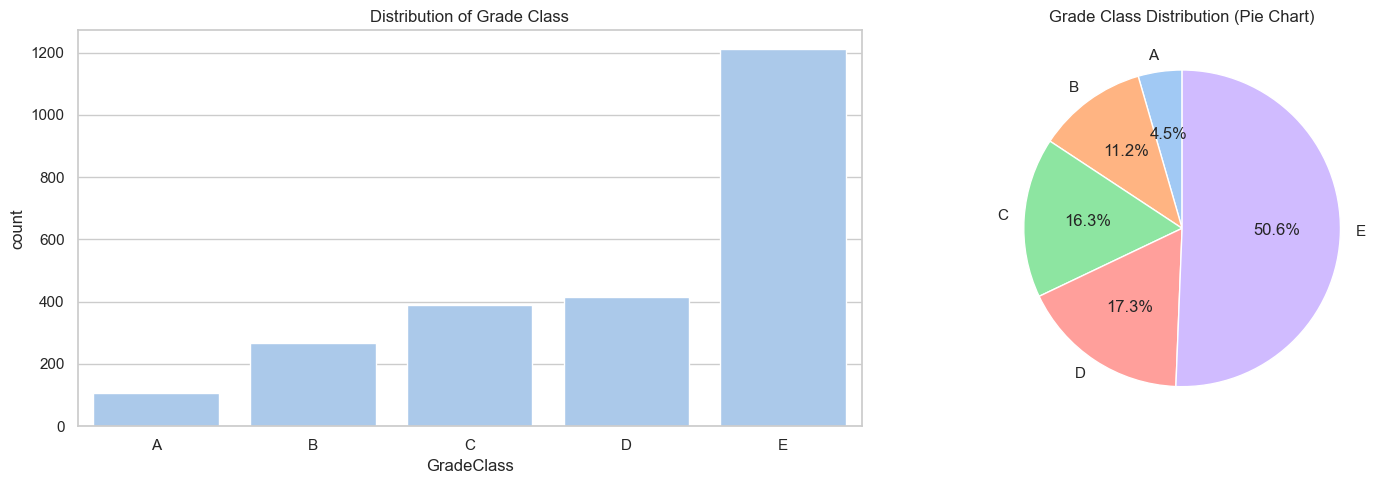

In [19]:
# Set custom labels
labels = ["A", "B", "C", "D", "E"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=data, x='GradeClass', ax=axes[0])
axes[0].set_title('Distribution of Grade Class')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
grade_counts = data['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

**The distribution of Grade Class reveals a significant imbalance, with Class E comprising approximately 50% of the dataset.
Classes A through D exhibit notably lower frequencies, with Class A representing only about 4.5%.**

**Separate Features and Target**

In [20]:
# Separate features (X) and target variable (y)
X = data.loc[:, data.columns != "GradeClass"]
y = data['GradeClass']

**Data Scaling**

In [21]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

**Train /Test Split**

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

**Modelling**

In [23]:
# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    # 'XGBoost': XGBClassifier(),
    # 'LightGBM': LGBMClassifier(),
    # 'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

Decision Tree accuracy: 0.63
Random Forest accuracy: 0.70
Gradient Boosting accuracy: 0.72
AdaBoost accuracy: 0.64
K-Nearest Neighbors accuracy: 0.54
Logistic Regression accuracy: 0.72
SGD Classifier accuracy: 0.64
Support Vector Machine accuracy: 0.70


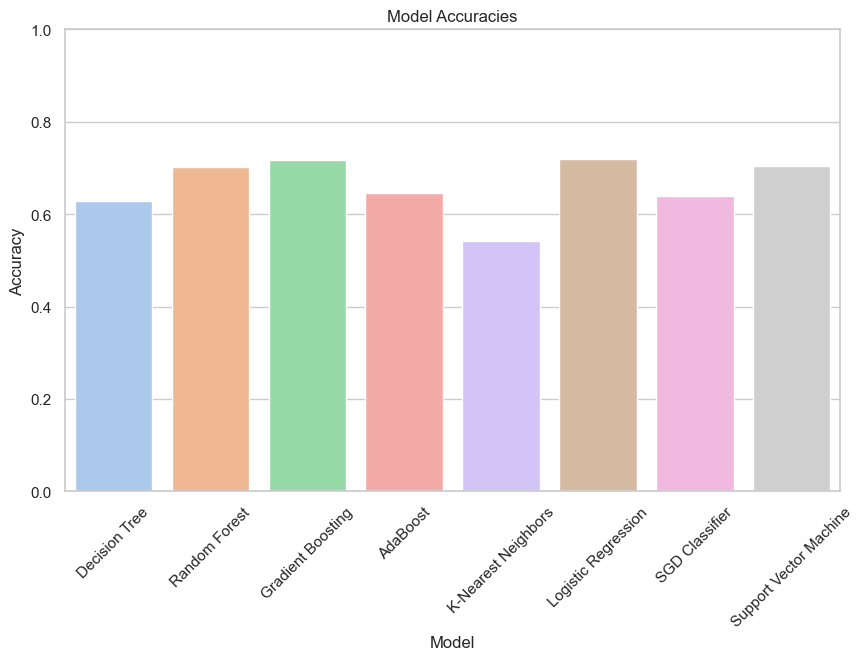

In [24]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define your chosen model
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


**The result might seem unimpressive at first glance. However, it's important to remember that we excluded the `GPA` column since our target variable, `Grade_Class`, was derived from it. Our objective was to predict `Grade_Class` using the other available features, and we successfully achieved this with a accuracy score of 0.74.**